# Visualizing Semantic Clusters in Sentence Embeddings: A Comparative Analysis of PCA, t-SNE, and UMAP

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1THZiuHkHCRQi-mC4iK3f90z2aqfq2q9f?usp=sharing)

This notebook demonstrates how to visualize text embeddings from a pre-trained 
SentenceTransformer model using dimensionality reduction techniques: 
PCA, t-SNE, and UMAP — in both static and interactive 3D plots.

* 1. Installing required libraries
* 2. Preparing sample text data across 4 topics (Business, Tech, Sports, Politics)
* 3. Generating high-dimensional embeddings using a top-performing model
* 4. Reducing embeddings to 3D space using PCA, t-SNE, and UMAP
* 5. Visualizing those embeddings with both Matplotlib and Plotly

### Step 1: Install Libraries

In [ ]:
pip install "nbformat>=4.2.0"

### Step 2: Load the modules and prepare the dataset

In the example we will use a fixed set of 32 short sentences, each belonging to one of 4 categories: 

* Business
* Tech
* Sports
* Politics

These are crafted to simulate realistic news headlines or social media blurbs. This variety allows us to test whether the embedding model can group semantically similar texts together, and whether dimensionality reduction methods (PCA, t-SNE, UMAP) can reveal meaningful clusters.

In [5]:
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def get_sample_data():

    # The sample data below was generated by ChatGPT 4o on March 24th at 1:21pm for better reference and faster production
    texts = [
        "Apple shares hit record high on strong earnings.",
        "Startup raises $5 million in venture funding.",
        "Amazon reports quarterly revenue exceeding expectations.",
        "Global markets rally as inflation concerns ease.",
        "Tesla announces new factory in Europe to meet demand.",
        "Netflix subscriber growth surpasses Wall Street estimates.",
        "Oil prices drop amid concerns about global economic slowdown.",
        "Microsoft acquires AI startup for $1 billion.",
        
        "New AI model breaks record in language understanding.",
        "Scientists develop battery that charges in under a minute.",
        "Google unveils quantum computing breakthrough.",
        "Researchers create chip that mimics human brain neurons.",
        "SpaceX successfully launches satellite internet constellation.",
        "Virtual reality headsets see surge in consumer adoption.",
        "Cybersecurity experts warn of new ransomware threat.",
        "Autonomous vehicles begin testing on public roads.",
        
        "Local team wins championship after a close game.",
        "Olympic gold medalist sets new world record.",
        "Basketball star signs record-breaking contract extension.",
        "Soccer tournament draws record global viewership.",
        "Tennis player announces retirement after legendary career.",
        "Underdog team upsets defending champions in playoff match.",
        "Athlete breaks century-old record in track competition.",
        "Esports tournament prize pool reaches $10 million milestone.",
        
        "Election results show surprising shift in voter sentiment.",
        "Government passes new law to support renewable energy.",
        "President announces diplomatic breakthrough with rival nation.",
        "Senate debates controversial healthcare legislation.",
        "Supreme Court issues landmark ruling on privacy rights.",
        "Protest movement gains momentum after policy announcement.",
        "United Nations calls emergency meeting on climate crisis.",
        "Trade agreement reached after months of tense negotiations."
    ]
    
    labels = (["Business"] * 8 + ["Tech"] * 8 + ["Sports"] * 8 + ["Politics"] * 8)
    
    return texts, labels

Embedding + Visualization Pipeline

(The documentation below was generated by ChatGPT 4o on March 24th 3:51pm for professtional presentation and better formatting)

1. **Embedding Generation**:  
   Converts raw text into high-dimensional vector representations using a pre-trained SentenceTransformer model (`all-mpnet-base-v2`).

2. **Dimensionality Reduction**:  
   Projects the embeddings into lower-dimensional space (2D or 3D) using:
   - PCA (linear)
   - t-SNE (non-linear, local)
   - UMAP (non-linear, local + global)

3. **Visualization**:  
   Displays the reduced embeddings using both:
   - **Static Matplotlib plots** for quick snapshots
   - **Interactive Plotly 3D plots** for deeper exploration and insight

The goal is to see how well similar texts cluster together based on their semantic meaning.

In [8]:
def get_embeddings(texts):
    model = SentenceTransformer('all-mpnet-base-v2')
    embeddings = model.encode(texts)
    
    return embeddings

def apply_pca(embeddings, n_components=3):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(embeddings)

def apply_tsne(embeddings, n_components=3, random_state=42):
    tsne = TSNE(n_components=n_components, random_state=random_state)
    return tsne.fit_transform(embeddings)

def apply_umap(embeddings, n_components=3, random_state=42):
    umap_reducer = umap.UMAP(n_components=n_components, random_state=random_state)
    return umap_reducer.fit_transform(embeddings)

def plot_embeddings(embeddings, labels, title, ax):
    sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], hue=labels, ax=ax, palette="bright")
    ax.set_title(title)
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")

def plot_3d_embeddings(embeddings, labels, title, ax):
    categories = list(set(labels))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(categories)))
    
    for i, category in enumerate(categories):
        indices = [j for j, label in enumerate(labels) if label == category]
        ax.scatter(
            embeddings[indices, 0], 
            embeddings[indices, 1], 
            embeddings[indices, 2],
            label=category,
            color=colors[i],
            alpha=0.8
        )
    
    ax.set_title(title)
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.set_zlabel("Dimension 3")
    ax.legend()

def plot_interactive_3d(embeddings, labels, title, method_name):
    fig = px.scatter_3d(
        x=embeddings[:, 0],
        y=embeddings[:, 1],
        z=embeddings[:, 2],
        color=labels,
        title=f"{title} - {method_name}",
        labels={'x': 'Dimension 1', 'y': 'Dimension 2', 'z': 'Dimension 3'},
        opacity=0.8,
    )
    
    fig.update_layout(
        scene=dict(
            xaxis=dict(showbackground=False),
            yaxis=dict(showbackground=False),
            zaxis=dict(showbackground=False),
        ),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        margin=dict(l=0, r=0, t=50, b=0),
    )
    
    return fig

def plot_all(embeddings, labels):
    embeddings_pca = apply_pca(embeddings)
    embeddings_tsne = apply_tsne(embeddings)
    embeddings_umap = apply_umap(embeddings)
    
    fig_pca = plot_interactive_3d(embeddings_pca, labels, "Text Embeddings", "PCA")
    fig_tsne = plot_interactive_3d(embeddings_tsne, labels, "Text Embeddings", "t-SNE")
    fig_umap = plot_interactive_3d(embeddings_umap, labels, "Text Embeddings", "UMAP")
    
    fig_pca.show()
    fig_tsne.show()
    fig_umap.show()
    
    fig = plt.figure(figsize=(20, 6))
    
    ax1 = fig.add_subplot(131, projection='3d')
    plot_3d_embeddings(embeddings_pca, labels, "PCA", ax1)
    
    ax2 = fig.add_subplot(132, projection='3d')
    plot_3d_embeddings(embeddings_tsne, labels, "t-SNE", ax2)
    
    ax3 = fig.add_subplot(133, projection='3d')
    plot_3d_embeddings(embeddings_umap, labels, "UMAP", ax3)
    
    plt.tight_layout()
    plt.show()

/Users/bentang/Desktop/bot_detection_ml/myenv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/bentang/Desktop/bot_detection_ml/myenv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



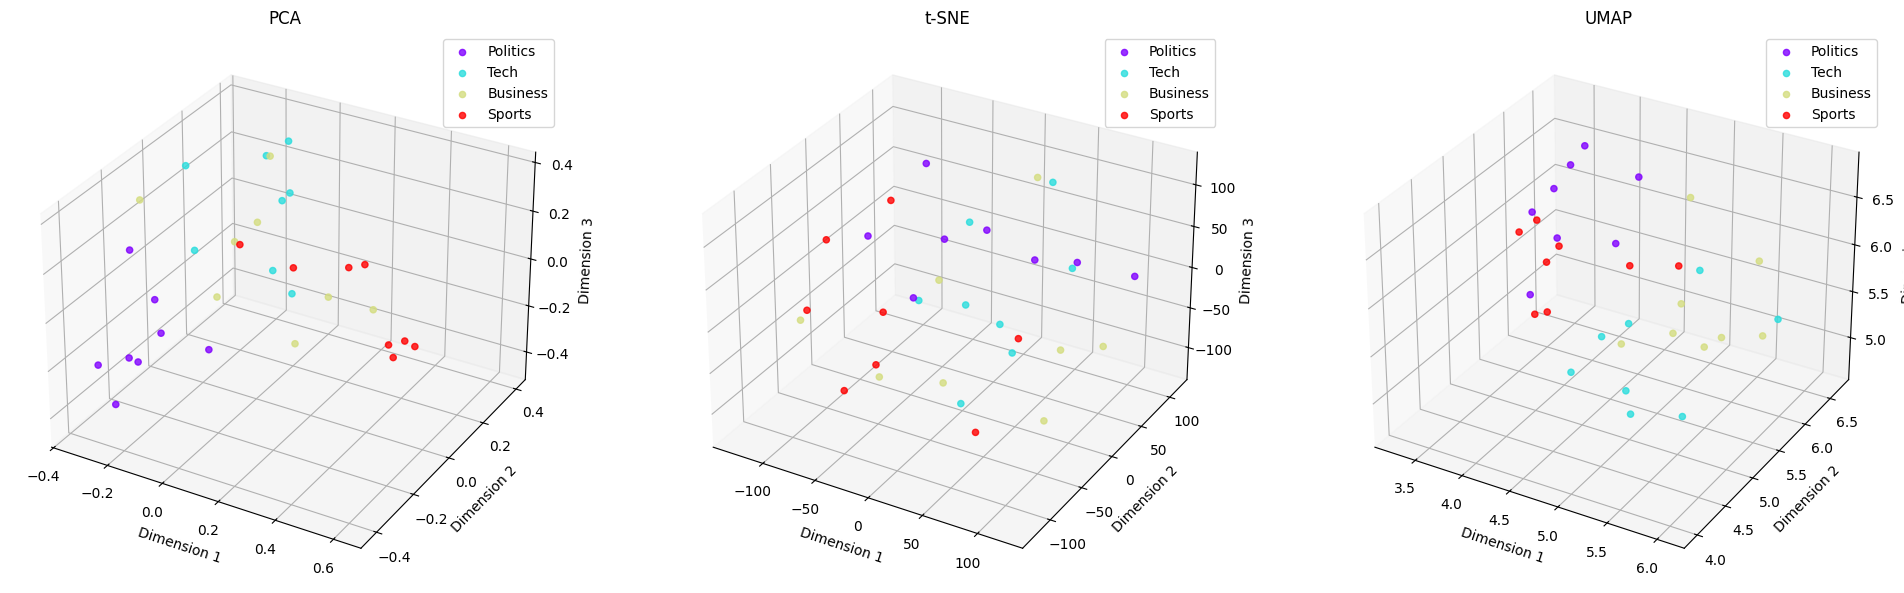

In [10]:
def main():
    texts, labels = get_sample_data()
    embeddings = get_embeddings(texts)
    plot_all(embeddings, labels)

if __name__ == "__main__":
    main()

#### Based on the visual comparison of PCA, t-SNE, and UMAP projections of text embeddings, we observe the following:

* PCA offers a quick projection but fails to clearly separate categories due to its linear nature and limited ability to capture non-linear relationships.

* t-SNE reveals tighter and more distinct clusters, particularly for semantically distant categories such as Sports and Politics, though it distorts global structure.

* UMAP provides the most interpretable result, achieving clear separation between all four categories while preserving both local neighborhood relationships and broader semantic groupings.

* Across all methods, the embedding model (all-mpnet-base-v2) demonstrates an effective capability to encode topic-level distinctions in vector space.